# FreshStack EDA

### Knowledge Base

In [2]:
from datasets import load_dataset

docs = load_dataset("freshstack/corpus-oct-2024", "langchain")

In [3]:
docs

DatasetDict({
    train: Dataset({
        features: ['_id', 'text', 'metadata'],
        num_rows: 49514
    })
})

In [40]:
docs["train"]

Dataset({
    features: ['_id', 'text', 'metadata'],
    num_rows: 49514
})

In [49]:
docs["train"][6]["_id"]

'azure-openai/Basic_Samples/README.md_0_4106'

In [50]:
print(docs["train"][6]["text"])

# Basic Samples

These are small code samples and snippets which complete small sets of actions and can be integrated into the user code.

### AAD Integration

| Sample | Language |
| --- | --- |
| [AAD integration REST API](./AAD_Integration/aad_integration_example_restapi.ipynb) | Python |
| [AAD integration Python SDK](./AAD_Integration/aad_integration_example_sdk.ipynb) | Python |

### Chat

| Sample | Language |
| --- | --- |
| [Basic chat completions .NET SDK](./Chat/dotnet/csharp/chat.ipynb) | .NET |
| [Basic chat completions Python SDK](./Chat/basic_chatcompletions_example_sdk.ipynb) | Python |
| [Chat with your own data .NET SDK](./Chat/dotnet/csharp/Chat_with_your_own_data.ipynb) | .NET |
| [Chat with your own data](./Chat/chat_with_your_own_data.ipynb) | Python |
| [ChatGPT managing conversations](./Chat/chatGPT_managing_conversation.ipynb) | Python |
| [Entity extraction for long documents](./Chat/dotnet/csharp/Entity_extraction_for_long_documents.ipynb) | .NET |

### Compl

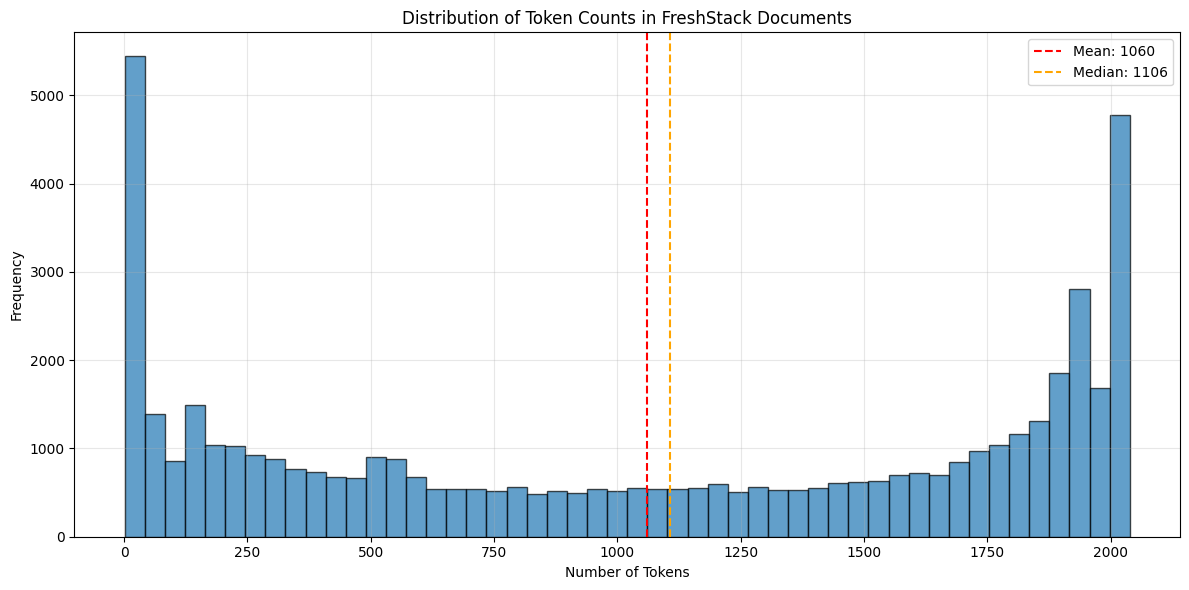

Token count statistics:
Mean: 1060.37
Median: 1106.00
Min: 1
Max: 2039
Standard deviation: 745.47


In [52]:
import tiktoken
import matplotlib.pyplot as plt
import numpy as np

# Initialize the tokenizer (using cl100k_base which is used by GPT-4)
tokenizer = tiktoken.get_encoding("cl100k_base")

# Count tokens for each document
token_counts = []
for doc in docs["train"]:
    text = doc["text"]
    # Disable special token checking to handle <|endoftext|> tokens
    token_count = len(tokenizer.encode(text, disallowed_special=()))
    token_counts.append(token_count)

# Create the distribution plot
plt.figure(figsize=(12, 6))
plt.hist(token_counts, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Distribution of Token Counts in FreshStack Documents')
plt.grid(True, alpha=0.3)

# Add some statistics to the plot
mean_tokens = np.mean(token_counts)
median_tokens = np.median(token_counts)
plt.axvline(mean_tokens, color='red', linestyle='--', label=f'Mean: {mean_tokens:.0f}')
plt.axvline(median_tokens, color='orange', linestyle='--', label=f'Median: {median_tokens:.0f}')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("Token count statistics:")
print(f"Mean: {mean_tokens:.2f}")
print(f"Median: {median_tokens:.2f}")
print(f"Min: {min(token_counts)}")
print(f"Max: {max(token_counts)}")
print(f"Standard deviation: {np.std(token_counts):.2f}")


In [4]:
docs["train"][6]["metadata"]

{'end_byte': 4106,
 'start_byte': 0,
 'url': 'https://github.com/Azure-Samples/openai/blob/main/Basic_Samples/README.md'}

### Queries

In [4]:
queries = load_dataset("freshstack/queries-oct-2024", "langchain")

Generating test split:   0%|          | 0/203 [00:00<?, ? examples/s]

In [14]:
queries

DatasetDict({
    test: Dataset({
        features: ['query_id', 'query_title', 'query_text', 'nuggets', 'answer_id', 'answer_text', 'metadata'],
        num_rows: 203
    })
})

In [28]:
queries["test"][0].keys()

dict_keys(['query_id', 'query_title', 'query_text', 'nuggets', 'answer_id', 'answer_text', 'metadata'])

In [27]:
queries["test"][0]["query_title"]

'issue parsing json file with Langchain'

In [25]:
queries["test"][0]["nuggets"][0]["text"]

'The JSON file contains an array of JavaScript objects, each representing a job.'

In [21]:
queries["test"][0]["nuggets"][0]["relevant_corpus_ids"]

['azure-search-openai-demo/tests/test_jsonparser.py_0_945',
 'azure-search-openai-demo/app/backend/prepdocslib/jsonparser.py_0_803',
 'llama_index/llama-index-legacy/tests/node_parser/test_json.py_0_1502',
 'llama_index/llama-index-core/tests/node_parser/test_json.py_0_1498',
 'langchainjs/docs/core_docs/docs/how_to/document_loaders_json.mdx_0_2510',
 'langchainjs/docs/core_docs/docs/integrations/document_loaders/file_loaders/json.mdx_0_2115',
 'langchainjs/langchain/src/document_loaders/tests/json.test.ts_0_3256',
 'langchain/docs/docs/how_to/document_loader_json.mdx_0_8249']

In [29]:
len(queries["test"][0]["nuggets"])

3

In [31]:
# Pretty print all nuggets for the first test query
for i, nugget in enumerate(queries["test"][0]["nuggets"]):
    print(f"Nugget {i+1}:")
    print(f"{nugget['text']}")
    print("-" * 50)

Nugget 1:
The JSON file contains an array of JavaScript objects, each representing a job.
--------------------------------------------------
Nugget 2:
The parser is currently treating each property of the JavaScript objects as separate documents.
--------------------------------------------------
Nugget 3:
The parser should be configured to treat each JavaScript object as a single document.
--------------------------------------------------


In [34]:
print(queries["test"][0]["nuggets"][1]["relevant_corpus_ids"])
print(len(queries["test"][0]["nuggets"][1]["relevant_corpus_ids"])) # prints 7

['langchainjs/docs/core_docs/docs/how_to/document_loaders_json.mdx_0_2510', 'langchainjs/docs/core_docs/docs/integrations/document_loaders/file_loaders/json.mdx_0_2115', 'langchainjs/langchain/src/document_loaders/tests/json-blob.test.ts_0_2760', 'langchainjs/langchain/src/document_loaders/tests/json.test.ts_0_3256', 'langchain/docs/docs/how_to/document_loader_json.mdx_9684_15962', 'langchain/docs/docs/integrations/document_loaders/json.ipynb_0_7310', 'langchain/libs/community/tests/unit_tests/document_loaders/test_json_loader.py_7383_12150']
7


Total number of relevant corpus ids across all queries: 3617
Average relevant corpus ids per query: 17.82
Average relevant corpus ids per nugget: 5.66
Average nuggets per query: 3.15

Distribution of nuggets per query:
1 nuggets: 2 queries (0.99%)
2 nuggets: 58 queries (28.57%)
3 nuggets: 84 queries (41.38%)
4 nuggets: 38 queries (18.72%)
5 nuggets: 12 queries (5.91%)
6 nuggets: 7 queries (3.45%)
7 nuggets: 1 queries (0.49%)
8 nuggets: 1 queries (0.49%)


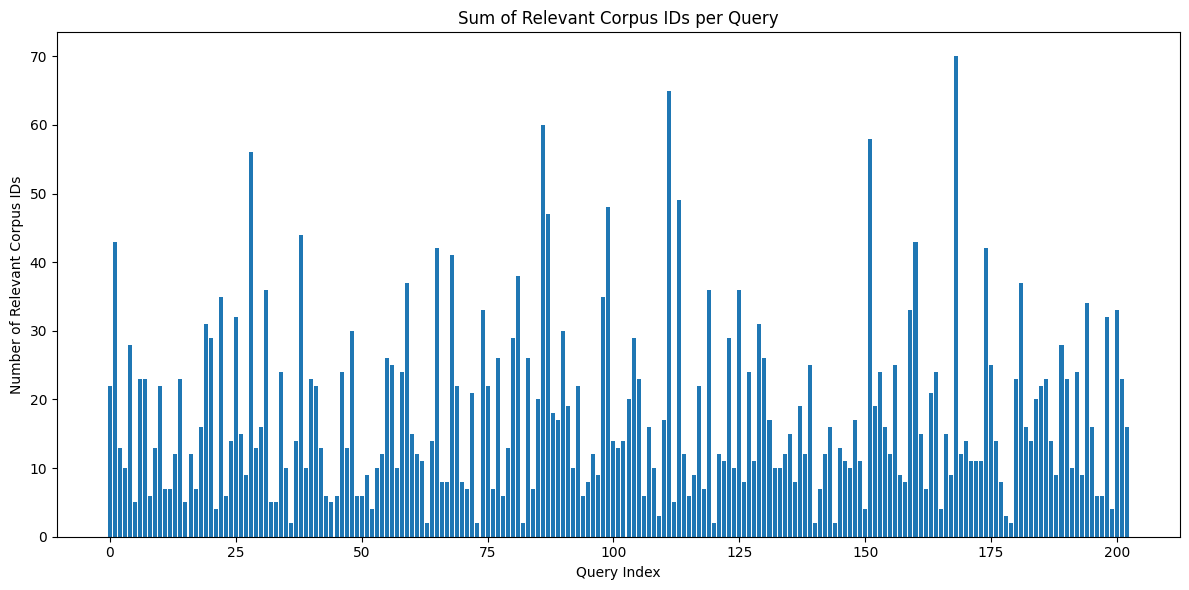

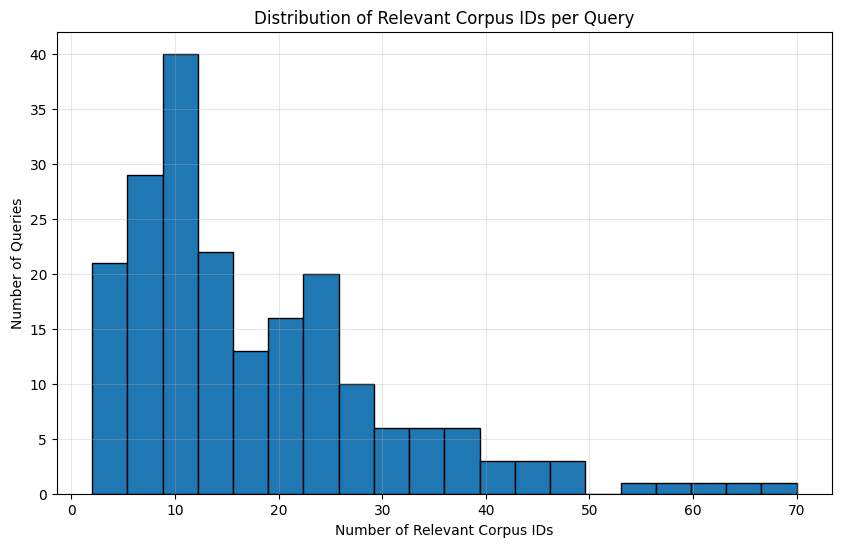

In [37]:
# Calculate the total number of relevant corpus ids per query
import matplotlib.pyplot as plt
from collections import Counter

# Initialize list to store the sum of relevant corpus ids per query
query_corpus_ids = []
query_titles = []

# Iterate through all queries and calculate sum for each
for query in queries["test"]:
    # Sum the relevant corpus ids for all nuggets in this query
    query_sum = sum(len(nugget["relevant_corpus_ids"]) for nugget in query["nuggets"])
    query_corpus_ids.append(query_sum)
    query_titles.append(query["query_title"])

# Calculate total across all queries
total_relevant_corpus_ids = sum(query_corpus_ids)
print(f"Total number of relevant corpus ids across all queries: {total_relevant_corpus_ids}")

# Calculate average per query
print(f"Average relevant corpus ids per query: {total_relevant_corpus_ids / len(queries['test']):.2f}")

# Also calculate average per nugget
total_nuggets = sum(len(query["nuggets"]) for query in queries["test"])
print(f"Average relevant corpus ids per nugget: {total_relevant_corpus_ids / total_nuggets:.2f}")

# Calculate average nuggets per query
avg_nuggets_per_query = total_nuggets / len(queries['test'])
print(f"Average nuggets per query: {avg_nuggets_per_query:.2f}")

# Count nuggets per query
nugget_counts = [len(query["nuggets"]) for query in queries["test"]]
count_distribution = Counter(nugget_counts)

# Print the distribution
print("\nDistribution of nuggets per query:")
for count, frequency in sorted(count_distribution.items()):
    print(f"{count} nuggets: {frequency} queries ({frequency/len(queries['test'])*100:.2f}%)")

# Create a graph of relevant corpus ids per query
plt.figure(figsize=(12, 6))
plt.bar(range(len(query_corpus_ids)), query_corpus_ids)
plt.xlabel('Query Index')
plt.ylabel('Number of Relevant Corpus IDs')
plt.title('Sum of Relevant Corpus IDs per Query')
plt.tight_layout()
plt.show()

# Create a histogram of the distribution
plt.figure(figsize=(10, 6))
plt.hist(query_corpus_ids, bins=20, edgecolor='black')
plt.xlabel('Number of Relevant Corpus IDs')
plt.ylabel('Number of Queries')
plt.title('Distribution of Relevant Corpus IDs per Query')
plt.grid(alpha=0.3)
plt.show()